In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np

In [ ]:
import pandas as pd
features=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Ms daan/Python /Python project/Features data set.csv")
#path = "/content/drive/MyDrive/Python Project/"
#features = pd.read_csv(path)


In [ ]:
sales = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Ms daan/Python /Python project/sales data-set.csv")

In [ ]:
stores = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Ms daan/Python /Python project/stores data-set.csv")

In [ ]:
feature_store = features.merge(stores, how='inner',on="Store")

In [ ]:
features.isnull().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In [ ]:
features['MarkDown1'].fillna(0, inplace=True)
features['MarkDown2'].fillna(0, inplace=True)
features['MarkDown3'].fillna(0, inplace=True)
features['MarkDown4'].fillna(0, inplace=True)
features['MarkDown5'].fillna(0, inplace=True)
features['CPI'].fillna(int(features['CPI'].mean()), inplace=True)
features['Unemployment'].fillna(int(features['Unemployment'].mean()), inplace=True)

In [ ]:
features.isnull().sum()

Store           0
Date            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
IsHoliday       0
dtype: int64

In [ ]:
sales = sales.groupby(['Store','Date']).sum().reset_index()

In [ ]:
sales

,Store,Date,Dept,Weekly_Sales,IsHoliday
0,1,01/04/2011,3137,1495064.75,0
1,1,01/06/2012,3137,1624477.58,0
2,1,01/07/2011,3035,1488538.09,0
3,1,01/10/2010,3233,1453329.50,0
4,1,02/03/2012,3236,1688420.76,0
...,...,...,...,...,...
6430,45,30/07/2010,2940,716859.27,0
6431,45,30/09/2011,2956,698986.34,0
6432,45,30/12/2011,2956,869403.63,68
6433,45,31/08/2012,2956,734297.87,0


In [ ]:
for index,rows in sales.iterrows():
    hol=rows.get("IsHoliday")
    if hol>0:
        sales.loc[index,"IsHoliday"]=1
sales


,Store,Date,Dept,Weekly_Sales,IsHoliday
0,1,01/04/2011,3137,1495064.75,0
1,1,01/06/2012,3137,1624477.58,0
2,1,01/07/2011,3035,1488538.09,0
3,1,01/10/2010,3233,1453329.50,0
4,1,02/03/2012,3236,1688420.76,0
...,...,...,...,...,...
6430,45,30/07/2010,2940,716859.27,0
6431,45,30/09/2011,2956,698986.34,0
6432,45,30/12/2011,2956,869403.63,1
6433,45,31/08/2012,2956,734297.87,0


In [ ]:
sales=sales.drop("Dept",axis=1)
sales

,Store,Date,Weekly_Sales,IsHoliday
0,1,01/04/2011,1495064.75,0
1,1,01/06/2012,1624477.58,0
2,1,01/07/2011,1488538.09,0
3,1,01/10/2010,1453329.50,0
4,1,02/03/2012,1688420.76,0
...,...,...,...,...
6430,45,30/07/2010,716859.27,0
6431,45,30/09/2011,698986.34,0
6432,45,30/12/2011,869403.63,1
6433,45,31/08/2012,734297.87,0


In [ ]:
sales = sales.merge(features, how='inner', on=['Store','Date','IsHoliday'])

In [ ]:
sales['Date'] = pd.to_datetime(sales['Date'])
sales['Year'] = pd.to_datetime(sales['Date']).dt.year
sales['Month'] = pd.to_datetime(sales['Date']).dt.month
sales['Week'] = pd.to_datetime(sales['Date']).dt.week
sales['Day'] = pd.to_datetime(sales['Date']).dt.day
sales.replace({'A': 1, 'B': 2,'C':3},inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  after removing the cwd from sys.path.


In [ ]:
sales

,Store,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Year,Month,Week,Day
0,1,2011-01-04,1495064.75,0,59.17,3.524,0.00,0.00,0.00,0.00,0.00,214.837166,7.682,2011,1,1,4
1,1,2012-01-06,1624477.58,0,77.95,3.501,6086.21,12.00,370.51,148.75,3690.85,221.747214,7.143,2012,1,1,6
2,1,2011-01-07,1488538.09,0,85.55,3.524,0.00,0.00,0.00,0.00,0.00,215.184137,7.962,2011,1,1,7
3,1,2010-01-10,1453329.50,0,71.89,2.603,0.00,0.00,0.00,0.00,0.00,211.671989,7.838,2010,1,1,10
4,1,2012-02-03,1688420.76,0,60.96,3.630,15441.40,1569.00,10.80,25390.88,8067.61,220.848045,7.348,2012,2,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2010-07-30,716859.27,0,79.78,2.781,0.00,0.00,0.00,0.00,0.00,182.441538,8.743,2010,7,30,30
6431,45,2011-09-30,698986.34,0,70.66,3.645,0.00,0.00,0.00,0.00,0.00,187.256664,8.625,2011,9,39,30
6432,45,2011-12-30,869403.63,1,37.79,3.389,3604.35,43941.56,287.45,357.43,750.01,189.062016,8.523,2011,12,52,30
6433,45,2012-08-31,734297.87,0,75.09,3.867,23641.30,6.00,92.93,6988.31,3992.13,191.461281,8.684,2012,8,35,31


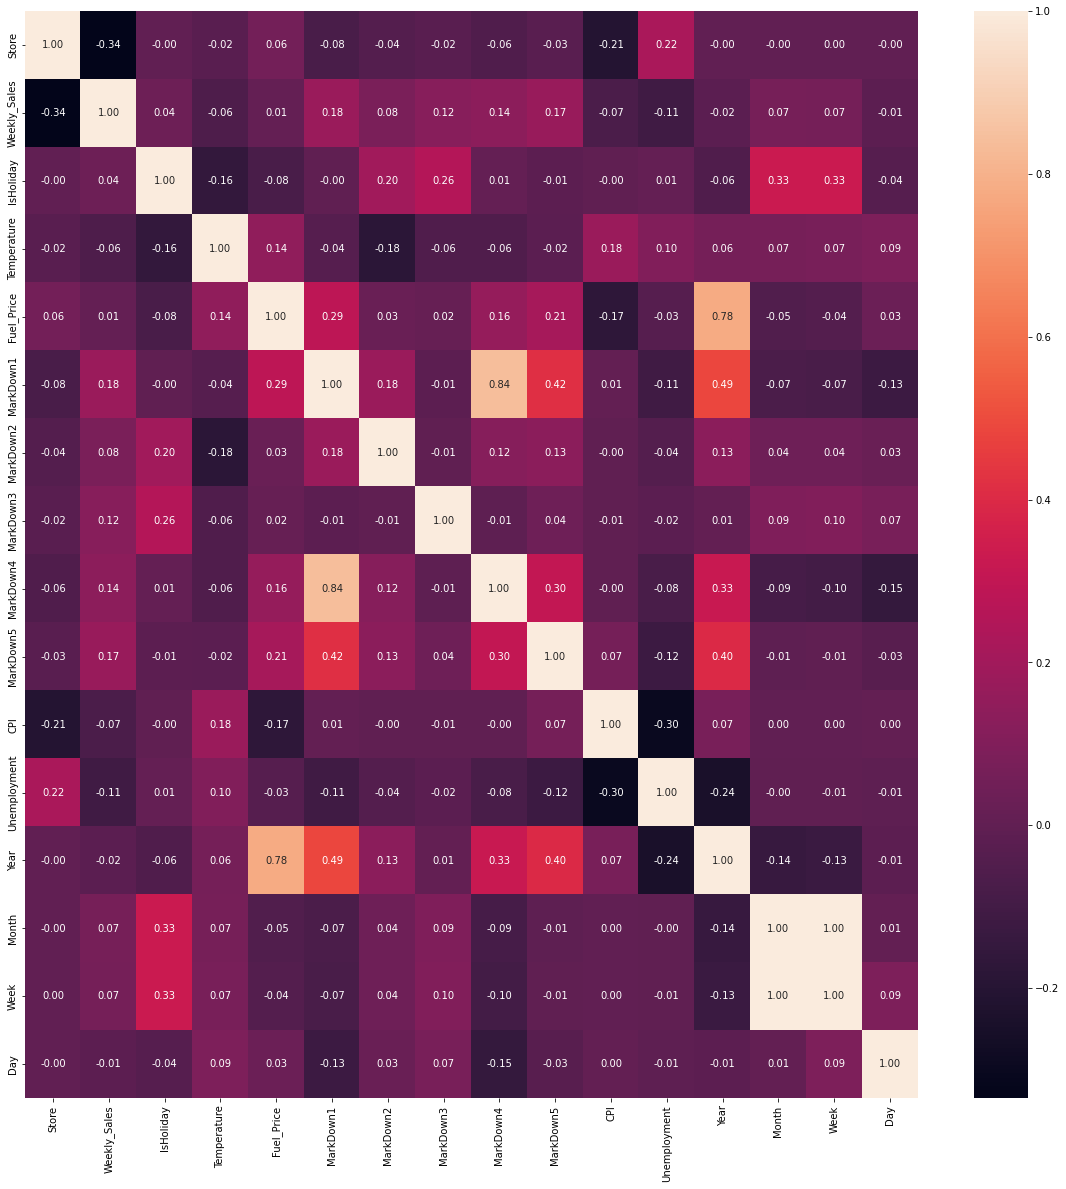

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
data_corr = sales.corr()

plt.figure(figsize=(20,20))
sns.heatmap(data_corr,annot=True,fmt=".2f")

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
numeric_cols = sales.select_dtypes(include=np.number).columns.tolist()
categorical_cols = sales.select_dtypes('object').columns.tolist()

In [ ]:
sales_num=sales[numeric_cols]

In [ ]:
sales_num

,Store,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Year,Month,Week,Day
0,1,1495064.75,0,59.17,3.524,0.00,0.00,0.00,0.00,0.00,214.837166,7.682,2011,1,1,4
1,1,1624477.58,0,77.95,3.501,6086.21,12.00,370.51,148.75,3690.85,221.747214,7.143,2012,1,1,6
2,1,1488538.09,0,85.55,3.524,0.00,0.00,0.00,0.00,0.00,215.184137,7.962,2011,1,1,7
3,1,1453329.50,0,71.89,2.603,0.00,0.00,0.00,0.00,0.00,211.671989,7.838,2010,1,1,10
4,1,1688420.76,0,60.96,3.630,15441.40,1569.00,10.80,25390.88,8067.61,220.848045,7.348,2012,2,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,716859.27,0,79.78,2.781,0.00,0.00,0.00,0.00,0.00,182.441538,8.743,2010,7,30,30
6431,45,698986.34,0,70.66,3.645,0.00,0.00,0.00,0.00,0.00,187.256664,8.625,2011,9,39,30
6432,45,869403.63,1,37.79,3.389,3604.35,43941.56,287.45,357.43,750.01,189.062016,8.523,2011,12,52,30
6433,45,734297.87,0,75.09,3.867,23641.30,6.00,92.93,6988.31,3992.13,191.461281,8.684,2012,8,35,31


In [ ]:
sales_num=sales_num.drop("Fuel_Price",axis=1)
sales_num=sales_num.drop("MarkDown4",axis=1)

In [ ]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(
    sales_num.drop(['Weekly_Sales'],axis='columns'), sales["Weekly_Sales"], test_size=0.2,random_state=1, shuffle=True)


In [ ]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler1 = MinMaxScaler()
X_train = scaler1.fit_transform(X_train)
X_test = scaler1.transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr=LinearRegression(normalize=True)
lr.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


LinearRegression(normalize=True)

In [ ]:
lr.score(X_train,y_train)

0.21417976875259281

In [ ]:
Y_pred=lr.predict(X_train)
Y_pred

array([ 838337.7377014 , 1156246.88169705, 1274411.51425755, ...,
        926501.89635532, 1244344.27169298,  532856.49762931])

In [ ]:
Y_pred_test=lr.predict(X_test)
Y_pred_test

array([1372357.09285668, 1278581.68579584, 1229291.71978074, ...,
        790794.64870184,  787617.93744167,  543664.13154851])

In [ ]:
from sklearn.metrics import mean_squared_error

mean_squared_error(Y_pred,y_train,squared=False)


495634.94295654824

In [ ]:
mean_squared_error(Y_pred_test,y_test,squared=False)

516665.6856549968

In [ ]:
lr.score(X_test,y_test)

0.21897782501485086

Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
def test_params(**params):
    model = RandomForestRegressor(random_state=42, n_jobs=-1, **params).fit(X_train, y_train)
    train_rmse = mean_squared_error(model.predict(X_train), y_train, squared=False)
    val_rmse = mean_squared_error(model.predict(X_test), y_test, squared=False)
    return train_rmse, val_rmse

In [ ]:
test_params(n_estimators=20, max_depth=20)

(49493.62730682827, 134470.73238477157)

In [ ]:
import matplotlib.pyplot as plt
def test_param_and_plot(param_name, param_values):
    train_errors, val_errors = [], [] 
    for value in param_values:
        params = {param_name: value}
        train_rmse, val_rmse = test_params(**params)
        train_errors.append(train_rmse)
        val_errors.append(val_rmse)
    plt.figure(figsize=(10,6))
    plt.title('Overfitting curve: ' + param_name)
    plt.plot(param_values, train_errors, 'b-o')
    plt.plot(param_values, val_errors, 'r-o')
    plt.xlabel(param_name)
    plt.ylabel('RMSE')
    plt.legend(['Training', 'Validation'])

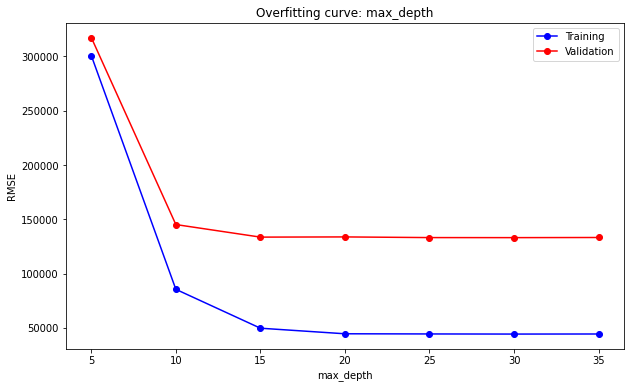

In [ ]:
test_param_and_plot('max_depth', [5, 10, 15, 20, 25, 30, 35])

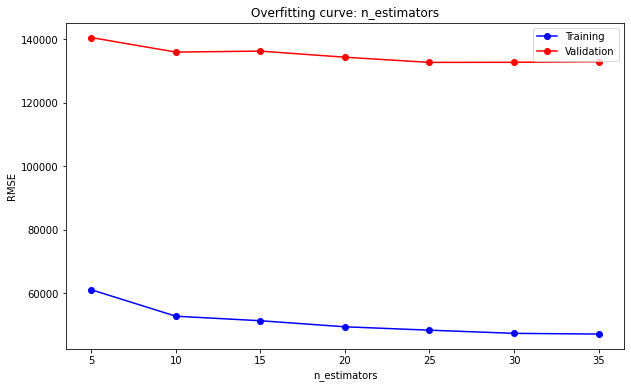

In [ ]:
test_param_and_plot('n_estimators', [5, 10, 15, 20, 25, 30, 35])

In [ ]:
RF = RandomForestRegressor(n_estimators=50, max_depth=27, max_features=6, min_samples_split=3, min_samples_leaf=1)
RF.fit(X_train,y_train)

RandomForestRegressor(max_depth=27, max_features=6, min_samples_split=3,
                      n_estimators=50)

In [ ]:
y_pred=RF.predict(X_test)

In [ ]:
mean_squared_error(y_pred,y_test,squared=False)

154193.71004306147

In [ ]:
RF.score(X_test,y_test)

0.9304371377705742

2 Query

In [ ]:
sales

,Store,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Year,Month,Week,Day
0,1,2011-01-04,1495064.75,0,59.17,3.524,0.00,0.00,0.00,0.00,0.00,214.837166,7.682,2011,1,1,4
1,1,2012-01-06,1624477.58,0,77.95,3.501,6086.21,12.00,370.51,148.75,3690.85,221.747214,7.143,2012,1,1,6
2,1,2011-01-07,1488538.09,0,85.55,3.524,0.00,0.00,0.00,0.00,0.00,215.184137,7.962,2011,1,1,7
3,1,2010-01-10,1453329.50,0,71.89,2.603,0.00,0.00,0.00,0.00,0.00,211.671989,7.838,2010,1,1,10
4,1,2012-02-03,1688420.76,0,60.96,3.630,15441.40,1569.00,10.80,25390.88,8067.61,220.848045,7.348,2012,2,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2010-07-30,716859.27,0,79.78,2.781,0.00,0.00,0.00,0.00,0.00,182.441538,8.743,2010,7,30,30
6431,45,2011-09-30,698986.34,0,70.66,3.645,0.00,0.00,0.00,0.00,0.00,187.256664,8.625,2011,9,39,30
6432,45,2011-12-30,869403.63,1,37.79,3.389,3604.35,43941.56,287.45,357.43,750.01,189.062016,8.523,2011,12,52,30
6433,45,2012-08-31,734297.87,0,75.09,3.867,23641.30,6.00,92.93,6988.31,3992.13,191.461281,8.684,2012,8,35,31


In [ ]:
new_sales=sales.drop("Date",axis=1)

In [ ]:
new_sales=new_sales.groupby(['Month','Year','Store']).agg({'Weekly_Sales':'sum', 'MarkDown1':'sum', 
'MarkDown2':'sum', 'MarkDown3':'sum', 'MarkDown4':'sum', 'MarkDown5':'sum','IsHoliday':'sum','CPI':'mean','Unemployment':'mean','Fuel_Price':'mean','Temperature':'mean'}).reset_index()
new_sales

,Month,Year,Store,Weekly_Sales,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,IsHoliday,CPI,Unemployment,Fuel_Price,Temperature
0,1,2010,1,1453329.50,0.00,0.0,0.00,0.00,0.00,0,211.671989,7.838,2.603,71.89
1,1,2010,2,1827440.43,0.00,0.0,0.00,0.00,0.00,0,211.329874,8.163,2.603,69.24
2,1,2010,3,358784.10,0.00,0.0,0.00,0.00,0.00,0,214.984655,7.564,2.603,73.60
3,1,2010,4,1842821.02,0.00,0.0,0.00,0.00,0.00,0,126.234600,7.127,2.619,63.96
4,1,2010,5,283178.12,0.00,0.0,0.00,0.00,0.00,0,212.226946,6.768,2.603,71.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1615,12,2012,41,1409544.97,1570.23,0.0,26.31,834.80,14421.12,0,199.053937,6.195,3.760,39.38
1616,12,2012,42,612379.90,49.38,0.0,10.87,0.00,970.72,0,131.108333,6.943,4.468,76.03
1617,12,2012,43,619369.72,90.11,0.0,14.56,0.00,911.55,0,214.677283,8.839,3.601,71.14
1618,12,2012,44,337796.13,69.96,0.0,3.05,0.00,999.62,0,131.108333,5.217,3.797,55.10


In [ ]:
for index,rows in new_sales.iterrows():
    hol=rows.get("IsHoliday")
    if hol>0:
        new_sales.loc[index,"IsHoliday"]=1
new_sales

,Month,Year,Store,Weekly_Sales,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,IsHoliday,CPI,Unemployment,Fuel_Price,Temperature
0,1,2010,1,1453329.50,0.00,0.0,0.00,0.00,0.00,0,211.671989,7.838,2.603,71.89
1,1,2010,2,1827440.43,0.00,0.0,0.00,0.00,0.00,0,211.329874,8.163,2.603,69.24
2,1,2010,3,358784.10,0.00,0.0,0.00,0.00,0.00,0,214.984655,7.564,2.603,73.60
3,1,2010,4,1842821.02,0.00,0.0,0.00,0.00,0.00,0,126.234600,7.127,2.619,63.96
4,1,2010,5,283178.12,0.00,0.0,0.00,0.00,0.00,0,212.226946,6.768,2.603,71.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1615,12,2012,41,1409544.97,1570.23,0.0,26.31,834.80,14421.12,0,199.053937,6.195,3.760,39.38
1616,12,2012,42,612379.90,49.38,0.0,10.87,0.00,970.72,0,131.108333,6.943,4.468,76.03
1617,12,2012,43,619369.72,90.11,0.0,14.56,0.00,911.55,0,214.677283,8.839,3.601,71.14
1618,12,2012,44,337796.13,69.96,0.0,3.05,0.00,999.62,0,131.108333,5.217,3.797,55.10


In [ ]:
new_sales['Sales category'] = pd.qcut(new_sales['Weekly_Sales'], q=3,labels=["low", "medium", "high"])
new_sales

,Month,Year,Store,Weekly_Sales,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,IsHoliday,CPI,Unemployment,Fuel_Price,Temperature,Sales category
0,1,2010,1,1453329.50,0.00,0.0,0.00,0.00,0.00,0,211.671989,7.838,2.603,71.89,low
1,1,2010,2,1827440.43,0.00,0.0,0.00,0.00,0.00,0,211.329874,8.163,2.603,69.24,low
2,1,2010,3,358784.10,0.00,0.0,0.00,0.00,0.00,0,214.984655,7.564,2.603,73.60,low
3,1,2010,4,1842821.02,0.00,0.0,0.00,0.00,0.00,0,126.234600,7.127,2.619,63.96,low
4,1,2010,5,283178.12,0.00,0.0,0.00,0.00,0.00,0,212.226946,6.768,2.603,71.10,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1615,12,2012,41,1409544.97,1570.23,0.0,26.31,834.80,14421.12,0,199.053937,6.195,3.760,39.38,low
1616,12,2012,42,612379.90,49.38,0.0,10.87,0.00,970.72,0,131.108333,6.943,4.468,76.03,low
1617,12,2012,43,619369.72,90.11,0.0,14.56,0.00,911.55,0,214.677283,8.839,3.601,71.14,low
1618,12,2012,44,337796.13,69.96,0.0,3.05,0.00,999.62,0,131.108333,5.217,3.797,55.10,low


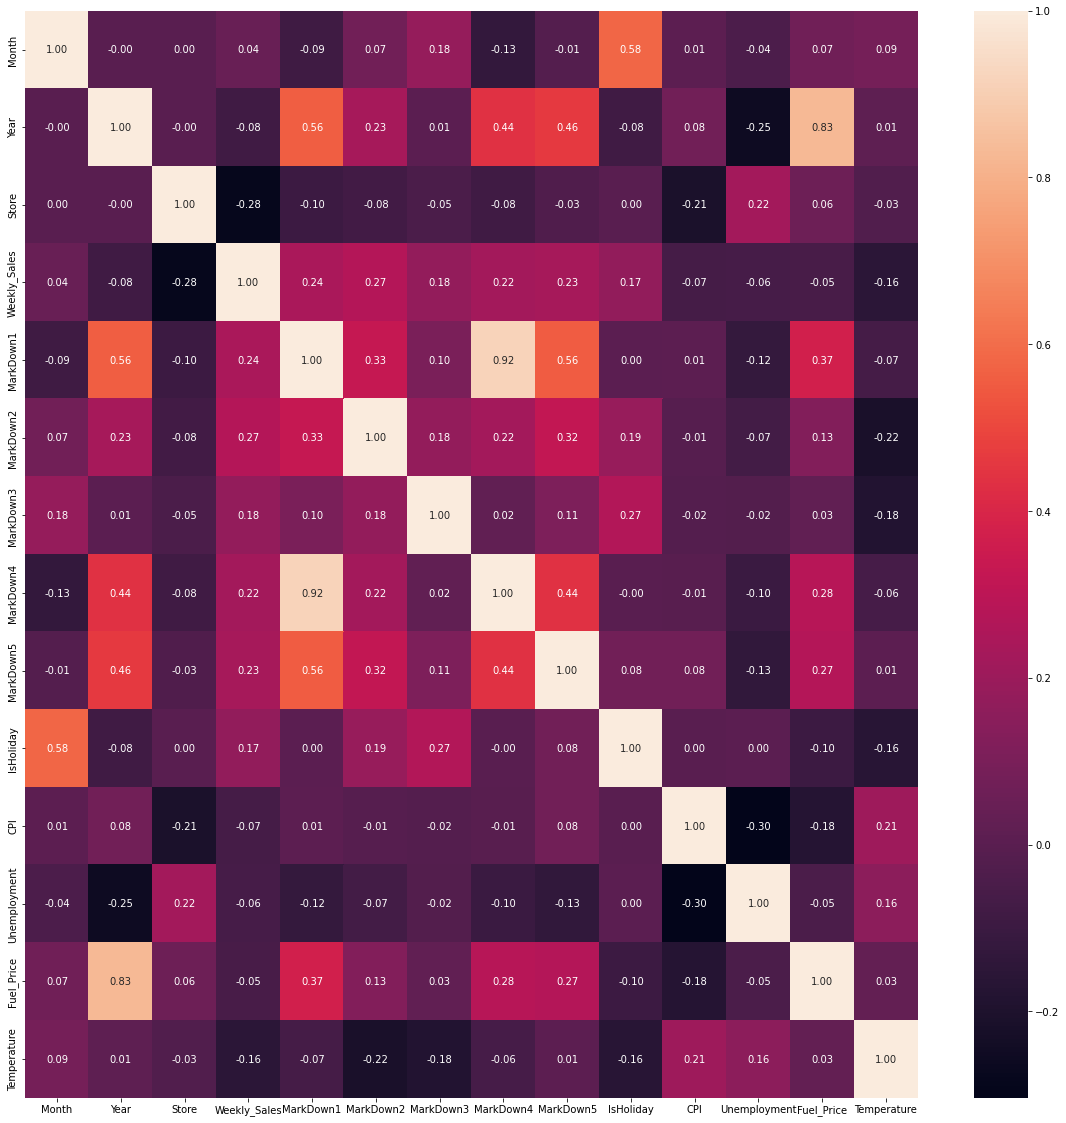

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

data_corr = new_sales.corr()

plt.figure(figsize=(20,20))
sns.heatmap(data_corr,annot=True,fmt=".2f")

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
new_sales

,Month,Year,Store,Weekly_Sales,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,IsHoliday,CPI,Unemployment,Fuel_Price,Temperature,Sales category
0,1,2010,1,1453329.50,0.00,0.0,0.00,0.00,0.00,0,211.671989,7.838,2.603,71.89,low
1,1,2010,2,1827440.43,0.00,0.0,0.00,0.00,0.00,0,211.329874,8.163,2.603,69.24,low
2,1,2010,3,358784.10,0.00,0.0,0.00,0.00,0.00,0,214.984655,7.564,2.603,73.60,low
3,1,2010,4,1842821.02,0.00,0.0,0.00,0.00,0.00,0,126.234600,7.127,2.619,63.96,low
4,1,2010,5,283178.12,0.00,0.0,0.00,0.00,0.00,0,212.226946,6.768,2.603,71.10,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1615,12,2012,41,1409544.97,1570.23,0.0,26.31,834.80,14421.12,0,199.053937,6.195,3.760,39.38,low
1616,12,2012,42,612379.90,49.38,0.0,10.87,0.00,970.72,0,131.108333,6.943,4.468,76.03,low
1617,12,2012,43,619369.72,90.11,0.0,14.56,0.00,911.55,0,214.677283,8.839,3.601,71.14,low
1618,12,2012,44,337796.13,69.96,0.0,3.05,0.00,999.62,0,131.108333,5.217,3.797,55.10,low


In [ ]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(
    new_sales.drop(['Weekly_Sales','Year','Sales category'],axis='columns'), new_sales["Sales category"], test_size=0.2,random_state=1, shuffle=True)


In [ ]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
ac = accuracy_score(y_test,y_pred)
ac

0.7160493827160493

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[85,  0, 23],
       [ 8, 85, 23],
       [23, 15, 62]])

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RFC= RandomForestClassifier(n_estimators=58, max_depth=27, max_features=6, min_samples_split=3, min_samples_leaf=1)
RFC.fit(X_train,y_train)

RandomForestClassifier(max_depth=27, max_features=6, min_samples_split=3,
                       n_estimators=58)

In [ ]:
y_pred=RFC.predict(X_test)

In [ ]:
ac = accuracy_score(y_test,y_pred)
ac

0.7901234567901234

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[88,  3, 17],
       [ 1, 99, 16],
       [15, 14, 71]])

In [ ]:
import xgboost as xgb
xgb_c1=xgb.XGBClassifier()
print(type(xgb_c1))

<class 'xgboost.sklearn.XGBClassifier'>


In [ ]:
xgb_c1.fit(X_train,y_train)

XGBClassifier(objective='multi:softprob')

In [ ]:
y_pred = xgb_c1.predict(X_test)

In [ ]:
ac = accuracy_score(y_test,y_pred)
ac

0.8024691358024691

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[91,  2, 15],
       [ 1, 97, 18],
       [17, 11, 72]])

In [ ]:
from sklearn.metrics import roc_curve
y_pred_prob1=model.predict(X_test)
fpr1 , tpr1, thresholds1=roc_curve(y_test, y_pred_prob1)

y_pred_prob2=RFC.predict(X_test)
fpr2 , tpr2, thresholds2= roc_curve(y_test, y_pred_prob2)

y_pred_prob3=xgb_c1.predict(X_test)
fpr3 , tpr3, thresholds3= roc_curve(y_test, y_pred_prob3)

plt.plot(fpr1,tpr1,label="Decision Tree")
plt.plot(fpr2,tpr2,label="Random Forest")
plt.plot(fpr3,tpr3,label="XGB")

plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC")
plt.show()

ValueError: ignored

3 Model

In [ ]:
feature_sales = features.merge(sales, how='inner',on=["Store","Date"])

ValueError: ignored

In [ ]:
feature_sales

In [ ]:
feature_sales=feature_sales.drop('IsHoliday_y',axis='columns')
feature_sales=feature_sales.rename(columns={'IsHoliday_x':'IsHoliday'})
feature_sales

In [ ]:
sales = feature_sales.groupby(['Dept','Date']).agg({'Weekly_Sales':'sum', 'MarkDown1':'sum', 'MarkDown2':'sum', 'MarkDown3':'sum', 'MarkDown4':'sum', 'MarkDown5':'sum',
        'IsHoliday':'sum','CPI':'mean','Unemployment':'mean','Fuel_Price':'mean','Temperature':'mean'}).reset_index()

In [ ]:
for index,rows in sales.iterrows():
    hol=rows.get("IsHoliday")
    if hol>0:
        sales.loc[index,"IsHoliday"]=1
sales

In [ ]:
sales = sales.drop(['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'],axis=1)

In [ ]:
sales['Date'] = pd.to_datetime(sales['Date'])
sales['Year'] = pd.to_datetime(sales['Date']).dt.year
sales['Month'] = pd.to_datetime(sales['Date']).dt.month
sales['Week'] = pd.to_datetime(sales['Date']).dt.week
sales['Day'] = pd.to_datetime(sales['Date']).dt.day
sales.replace({'A': 1, 'B': 2,'C':3},inplace=True)

In [ ]:
sales

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sales_corr = sales.corr()

plt.figure(figsize=(20,20))
sns.heatmap(sales_corr,annot=True,fmt=".2f")

In [ ]:
sales = sales.drop(['Date'],axis=1)

In [ ]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(
    sales.drop(['Weekly_Sales'],axis='columns'), sales["Weekly_Sales"], test_size=0.2,random_state=1, shuffle=True)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler1 = MinMaxScaler()
X_train = scaler1.fit_transform(X_train)
X_test = scaler1.transform(X_test)

In [ ]:
from sklearn.tree import DecisionTreeRegressor 
from sklearn.model_selection import cross_val_score
rt = DecisionTreeRegressor()
rt.fit(X_train, y_train)
scores = cross_val_score(rt, X_train, y_train, scoring='r2', cv=3)
print("r2 scores from cross-validation: " + str(scores))

In [ ]:
import sklearn
y_pred = rt.predict(X_test)
r2 = sklearn.metrics.r2_score(y_test, y_pred)
print("r2 score of model:" + str(r2))

In [ ]:
from sklearn.linear_model import LinearRegression
rl=LinearRegression()
rl.fit(X_train,y_train)
scores = cross_val_score(rl, X_train, y_train, scoring='r2', cv=3)
print("r2 scores from cross-validation: " + str(scores))

In [ ]:
y_pred = rl.predict(X_test)
r2 = sklearn.metrics.r2_score(y_test, y_pred)
print("r2 score of model:" + str(r2))

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=30, max_depth=20)
rf.fit(X_train,y_train)
scores = cross_val_score(rf, X_train, y_train, scoring='r2', cv=3)
print("r2 scores from cross-validation: " + str(scores))

In [ ]:
y_pred = rf.predict(X_test)
r2 = sklearn.metrics.r2_score(y_test, y_pred)
print("r2 score of model:" + str(r2))